In [1]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution
import matplotlib
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_nogrowth import cn_nogrowth
from numerical.cn_nogrowth_numba import cn_nogrowth as cn_nogrowth_numba
from numerical.cn_plot import plot1D, surfpattern
import pickle
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline
#system parameters
circuit_n = 'turinghill'
variant=0 
n_param_sets = 10
mechanism = 'nogrowth'

#dataframes with parameters and lsa output
# df= pickle.load( open(modellingpath + "/growth/input/parameterfiles/df_%s_variant%r_%rparametersets.pkl"%(circuit_n,variant,n_param_sets), "rb"))
multiple_lsa_df= pickle.load( open(modellingpath + "/growth/out/analytical/lsa_dataframes/lsa_df_%s_variant%r_%rparametersets.pkl"%(circuit_n,variant,n_param_sets), "rb"))
lsa_df = multiple_lsa_df.xs(0, level=1)

#solver parameters
L=50; x_gridpoints=5; J=L*x_gridpoints;I=J 
T=5000; t_gridpoints = 30; N=T*t_gridpoints #Number of timepoints
#solver parameters
# L=10; x_gridpoints=5; J=L*x_gridpoints;I=J 
# T=100; t_gridpoints = 2; N=T*t_gridpoints #Number of timepoints

filename = lambda parID: '%s_variant%s_%s_ID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,mechanism,parID,L,J,T,N)

parID= 1 #parameter set to use
par_dict = lsa_df.loc[parID].to_dict()
print(par_dict)
#run


{'ba': 0.01, 'bb': 0.01, 'Va': 92.51619903807651, 'Vb': 458.6080757193134, 'kaa': 0.3100083502970272, 'kba': 216.16591202229395, 'kab': 4.390301983004056, 'kbb': 4.131200207248657, 'mua': 18.940372777976208, 'mub': 0.023308357204826935, 'd_B': 8.112481010414282, 'd_A': 1.0, 'n': 2.0, 'ss_n': 3.0, 'ss_list': array([0.00054294, 0.42933121]), 'ss_class': 'stable point', 'system_class': 'simple stable', 'maxeig': (-0.023308357212365297+0j)}


entering forloop not numba


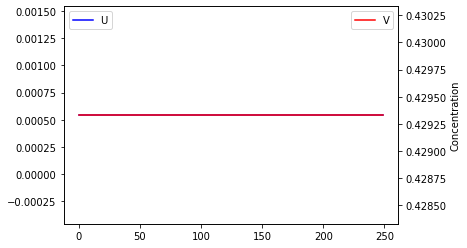

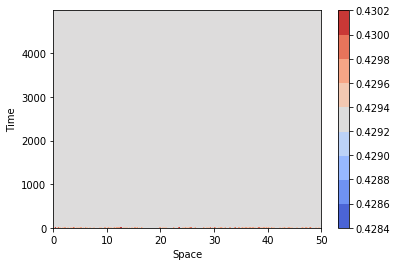

0.4293315989066797 0.4293315989066787


In [3]:
from tqdm import tqdm


U_final,U_record, U0, x_grid, reduced_t_grid= cn_nogrowth(par_dict,L,J,T,N, circuit_n, tqdm_disable=True)

# pickle.dump(U_final, open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'wb'))
# pickle.dump(U_record, open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'wb'))

#plot
plot1D(U_final, savefig=False)
plt.show()


surfpattern(U_record, [x_grid, reduced_t_grid], 'linear',morphogen=1, rate=0, savefig=False,filename='',logResults=False,normalize=False)
# surfpattern(U_record, [x_grid, reduced_t_grid], 'linear',  morphogen=0, rate=0, savefig=False,filename='',logResults=False,normalize=False)
plt.show()
print(np.amax(U_final[1]), np.amin(U_final[1]))


entering numba for loop


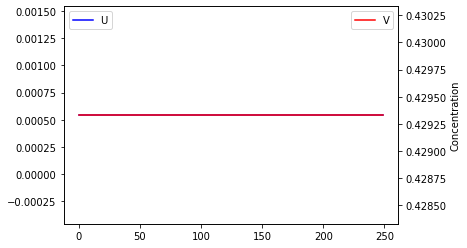

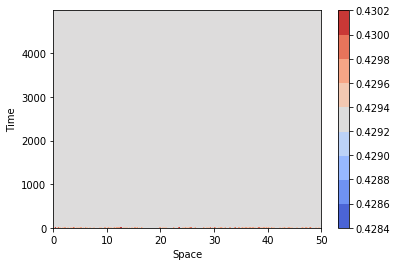

0.4293315989066797 0.4293315989066787


In [2]:
U_finaln,U_record, U0, x_grid, reduced_t_grid= cn_nogrowth_numba(par_dict,L,J,T,N, circuit_n, tqdm_disable=False)

# pickle.dump(U_final, open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'wb'))
# pickle.dump(U_record, open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s.pkl'%(circuit_n,mechanism,filename(parID)), 'wb'))

#plot
plot1D(U_finaln, savefig=False)
plt.show()


surfpattern(U_record, [x_grid, reduced_t_grid], 'linear',morphogen=1, rate=0, savefig=False,filename='',logResults=False,normalize=False)
# surfpattern(U_record, [x_grid, reduced_t_grid], 'linear',  morphogen=0, rate=0, savefig=False,filename='',logResults=False,normalize=False)
plt.show()
print(np.amax(U_finaln[1]), np.amin(U_finaln[1]))

